In [1]:
from ClementAnalyse import *

In [14]:
w15 = GammaFits("HauteEnergie/Data/source_observation/lat_photon_weekly_w016_p305_v001.fits")
w15.make_all_slice(1000)
w15.plot_all_slice_hist(vmin=0, vmax=5,show=False)
print("DONE")

100%|██████████| 283466/283466 [00:00<00:00, 4709354.91it/s]


Le nombre de slice total désiré ne divise pas le nombre de données.
 Le nombre le plus proche trouvé est : 1992
::	 le nombre d'event par slice est de 284
Création des slice en cours


100%|██████████| 1992/1992 [00:01<00:00, 1982.85it/s]


Calcule de la statistique de toute les slice en cours ...


100%|██████████| 1991/1991 [02:39<00:00, 12.51it/s]

DONE


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([2.78653018e-03, 1.00213767e+00, 2.00148880e+00, 3.00083994e+00,
        4.00019107e+00, 4.99954221e+00, 5.99889335e+00, 6.99824448e+00,
        7.99759562e+00, 8.99694676e+00, 9.99629789e+00, 1.09956490e+01,
        1.19950002e+01, 1.29943513e+01, 1.39937024e+01, 1.49930536e+01,
        1.59924047e+01, 1.69917558e+01, 1.79911070e+01, 1.89904581e+01,
        1.99898093e+01, 2.09891604e+01, 2.19885115e+01, 2.29878627e+01,
        2.39872138e+01, 2.49865649e+01, 2.59859161e+01, 2.69852672e+01,
        2.79846183e+01, 2.89839695e+01, 2.99833206e+01, 3.09826718e+01,
        3.19820229e+01, 3.29813740e+01, 3.39807252e+01, 3.49800763e+01,
        3.59794274e+01, 3.69787786e+01, 3.79781297e+01, 3.89774808e+01,
        3.99768320e+01, 4.09761

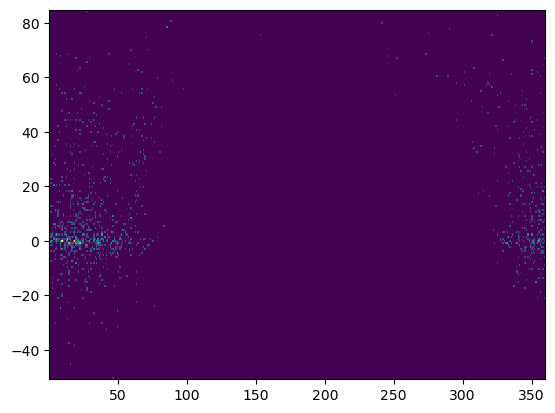

In [ ]:
plt.hist2d(w15.L_cut,w15.B_cut,bins=[360, 180])

In [ ]:
H,xe,ye=np.histogram2d(w15.L_cut,w15.B_cut,bins=[360, 180])

In [ ]:
Xe,Ye=np.meshgrid(xe,ye)

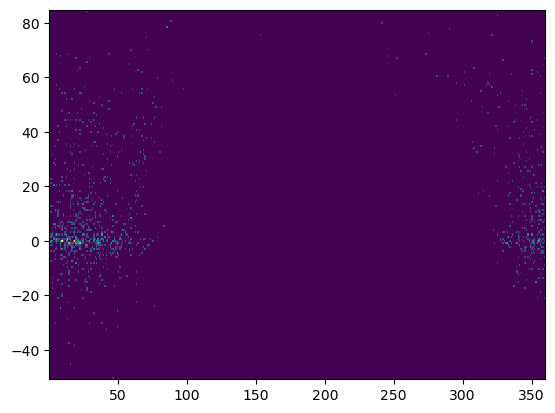

In [ ]:
plt.pcolormesh(Xe,Ye,H.T)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([2.78653018e-03, 1.00213767e+00, 2.00148880e+00, 3.00083994e+00,
        4.00019107e+00, 4.99954221e+00, 5.99889335e+00, 6.99824448e+00,
        7.99759562e+00, 8.99694676e+00, 9.99629789e+00, 1.09956490e+01,
        1.19950002e+01, 1.29943513e+01, 1.39937024e+01, 1.49930536e+01,
        1.59924047e+01, 1.69917558e+01, 1.79911070e+01, 1.89904581e+01,
        1.99898093e+01, 2.09891604e+01, 2.19885115e+01, 2.29878627e+01,
        2.39872138e+01, 2.49865649e+01, 2.59859161e+01, 2.69852672e+01,
        2.79846183e+01, 2.89839695e+01, 2.99833206e+01, 3.09826718e+01,
        3.19820229e+01, 3.29813740e+01, 3.39807252e+01, 3.49800763e+01,
        3.59794274e+01, 3.69787786e+01, 3.79781297e+01, 3.89774808e+01,
        3.99768320e+01, 4.09761

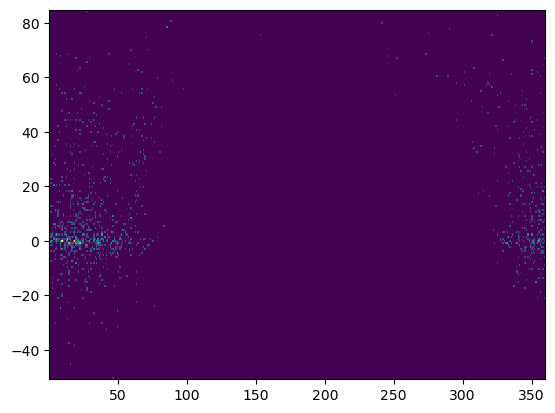

In [ ]:
plt.hist2d(w15.L_cut,w15.B_cut,bins=[360, 180])

In [ ]:
plt.close("all")

In [ ]:
X, Y = np.meshgrid(w15.xedges_tot, w15.yedges_tot)

In [ ]:
C =np.atleast_2d(w15.all_counts[:,:,:]) 
C[0]==w15.all_counts[:,:,:].T

/tmp/ipykernel_13431/1281878798.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  C[0]==w15.all_counts[:,:,:].T


False

In [ ]:
np.transpose(w15.all_counts[:,:,:],axes=()).shape

ValueError: axes don't match array

In [ ]:
C.shape

(360, 180, 392)

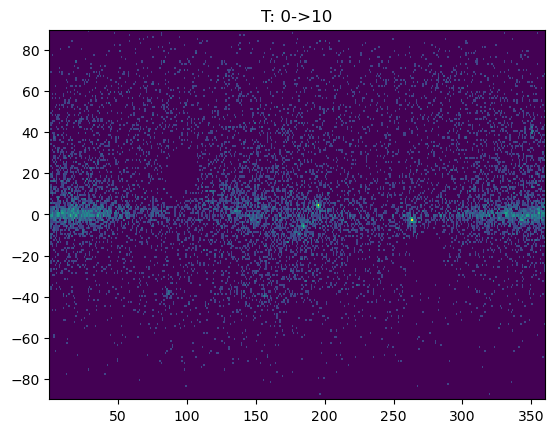

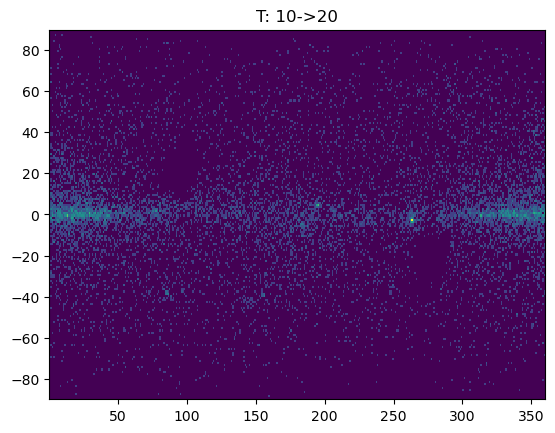

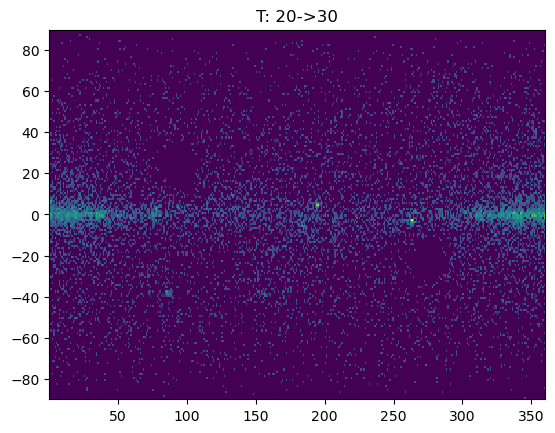

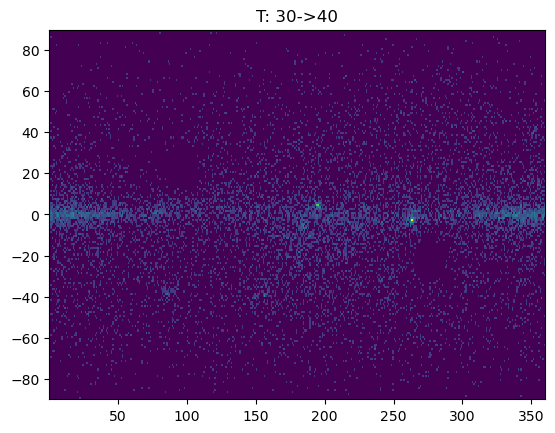

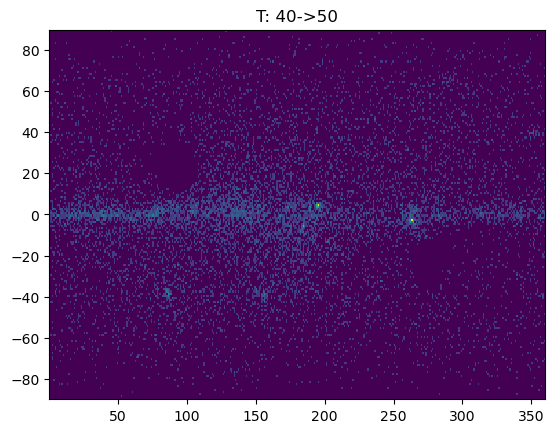

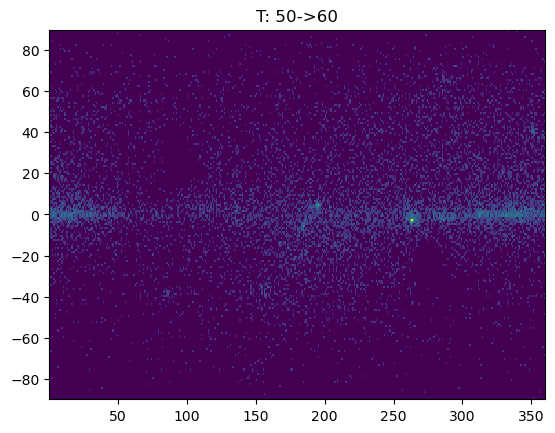

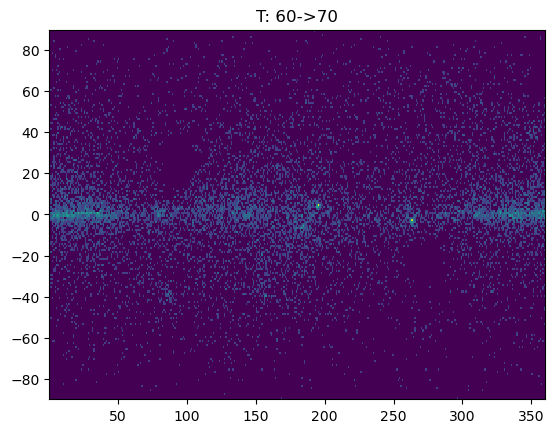

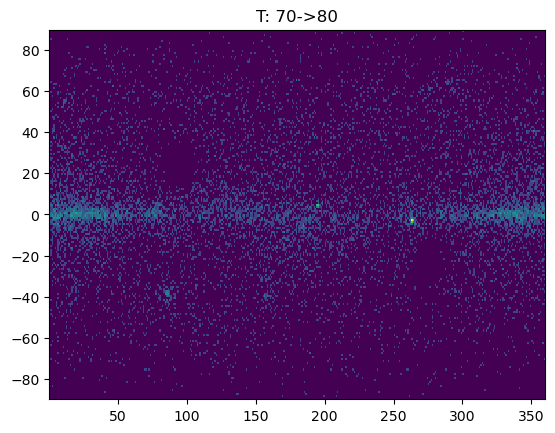

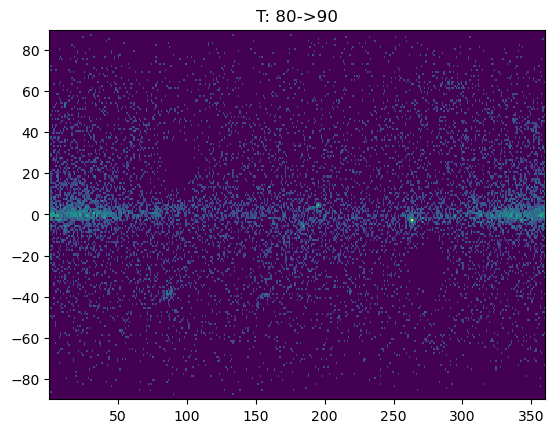

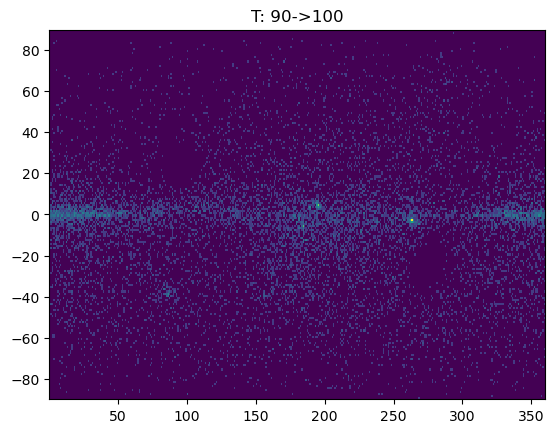

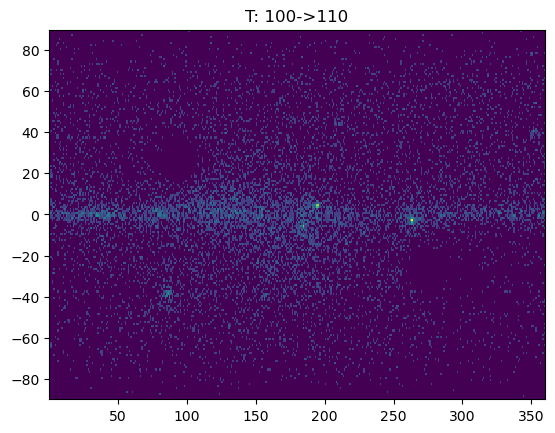

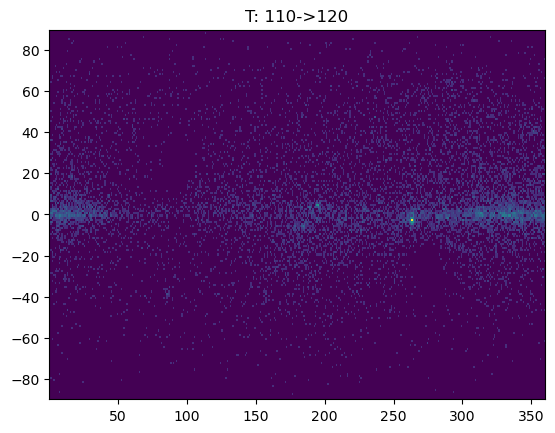

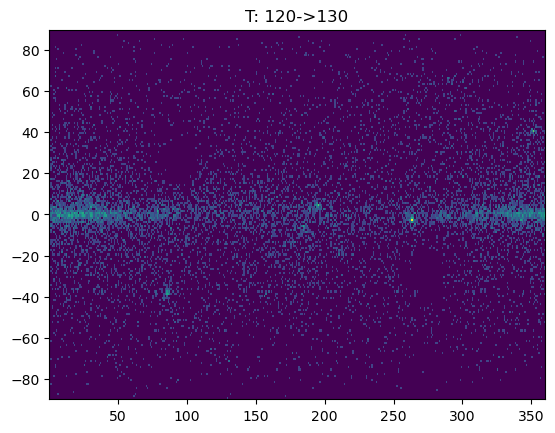

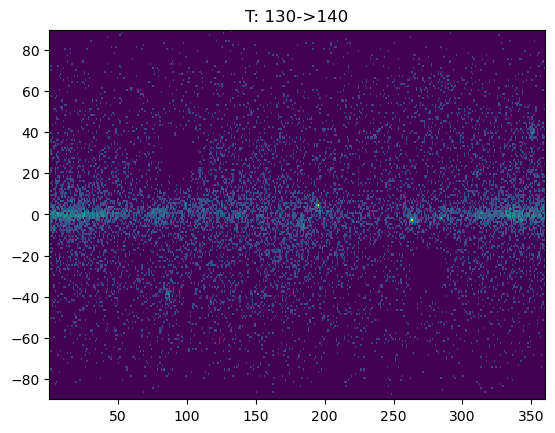

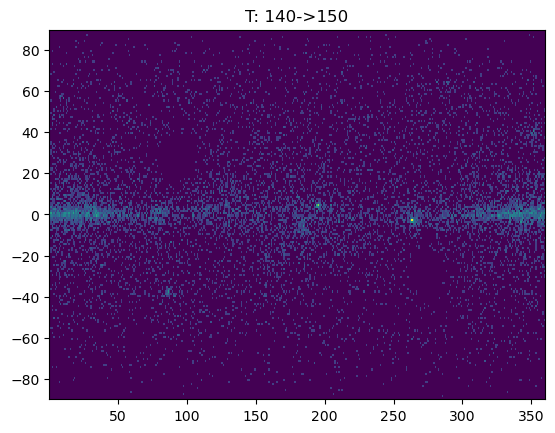

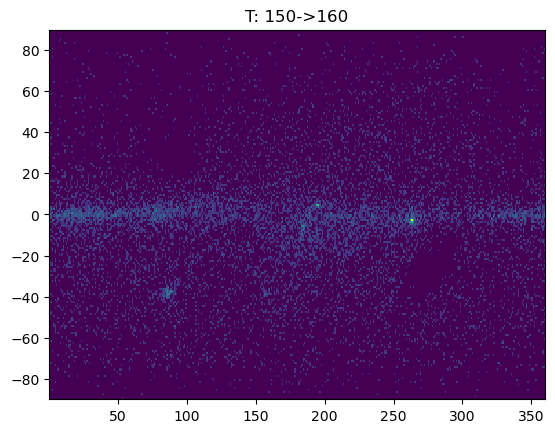

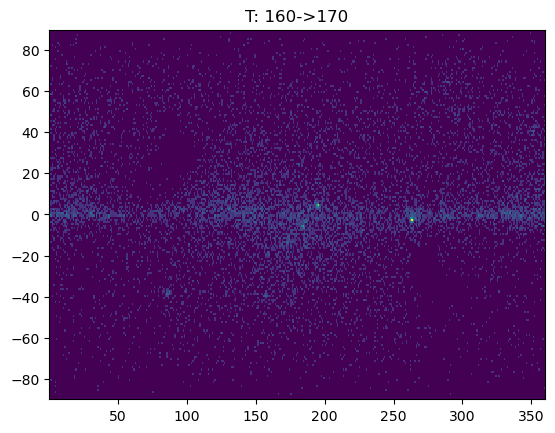

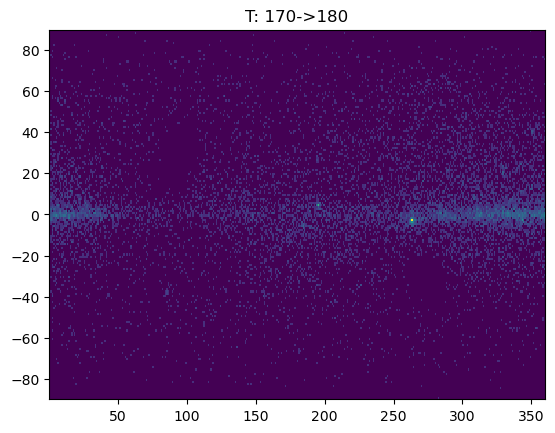

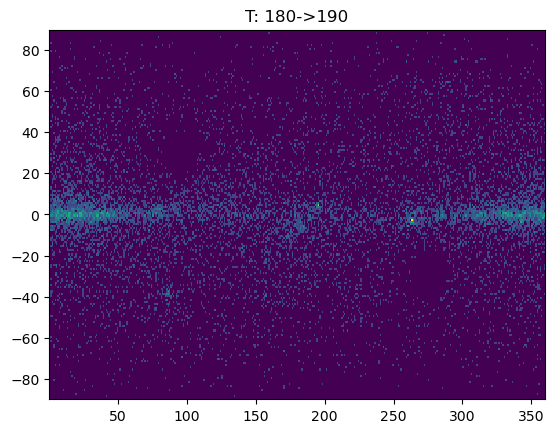

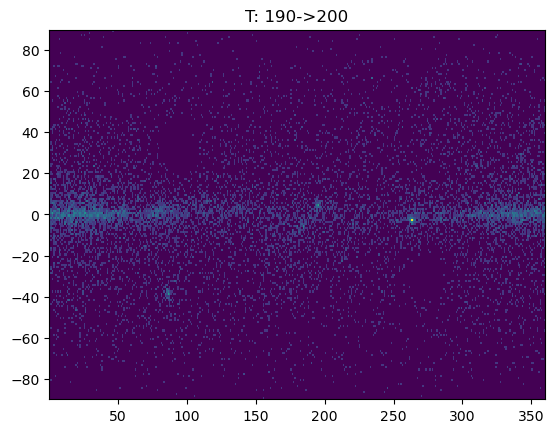

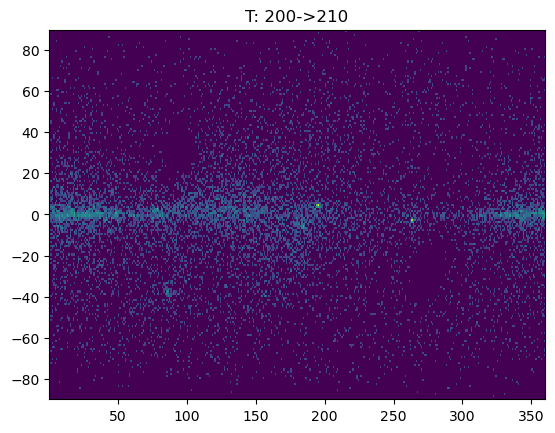

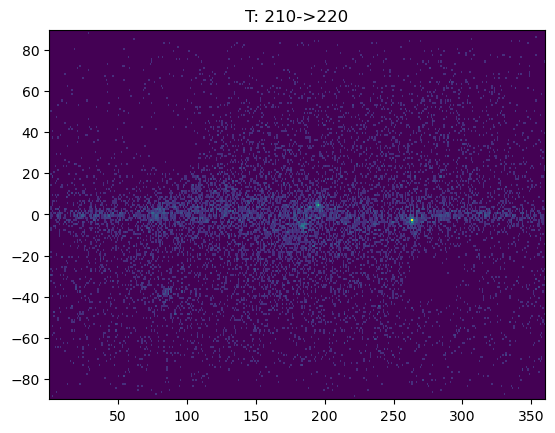

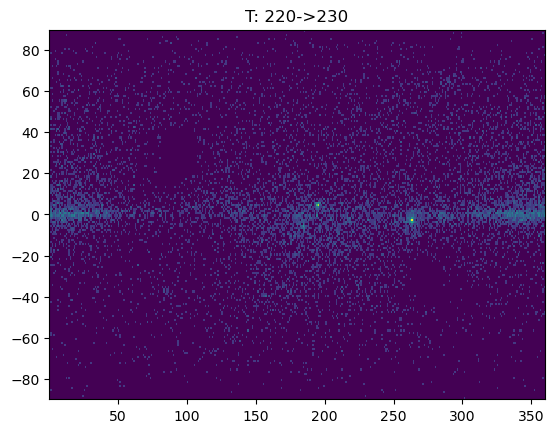

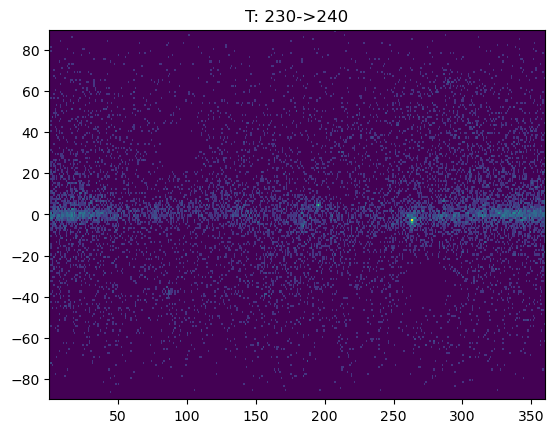

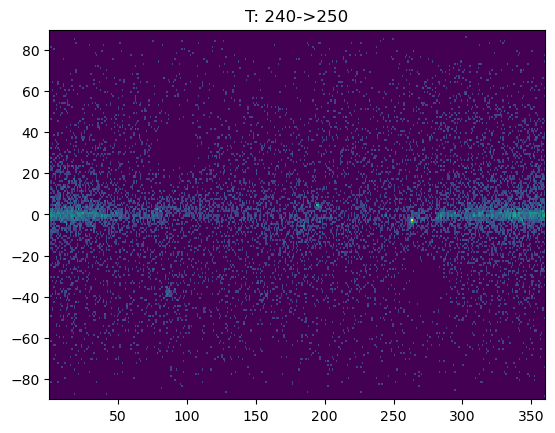

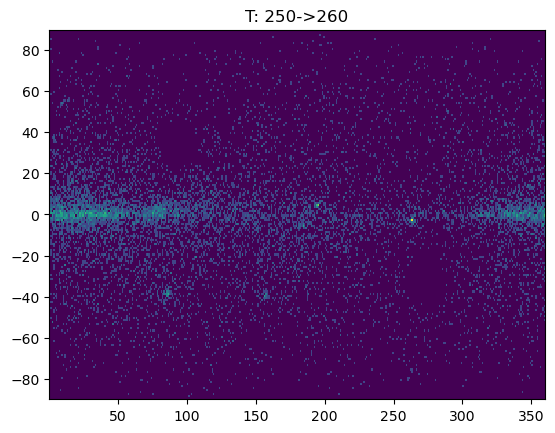

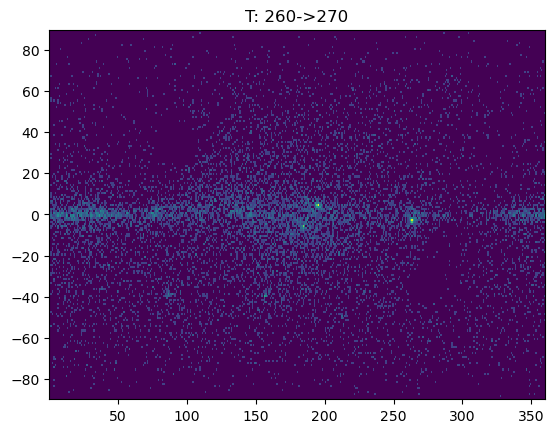

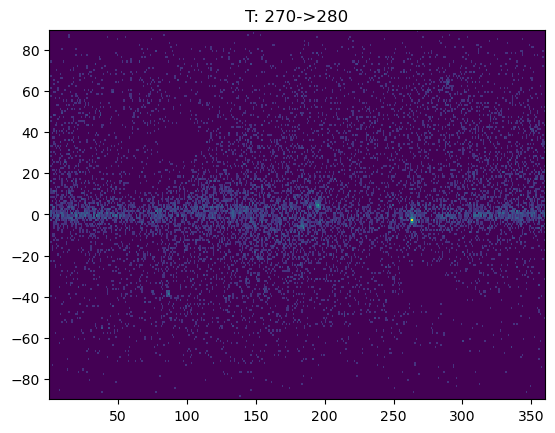

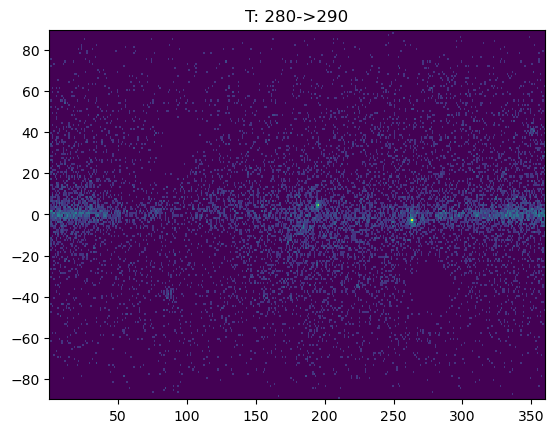

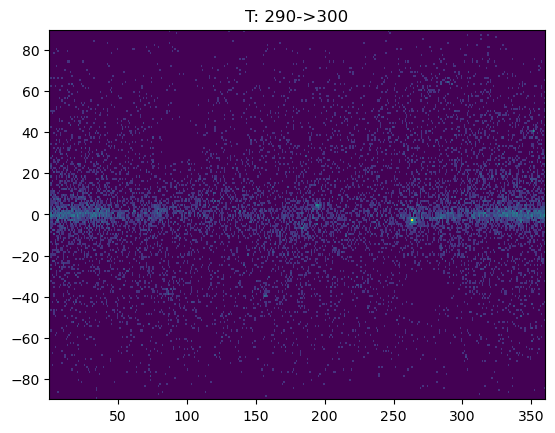

In [ ]:
def sumslide(Fits:GammaFits,start,stop,operation=np.sum):
    res=operation(w15.all_counts[:,:,start:stop],axis=2)
    return res
def sumplot(Fits,n,stop,operation=np.sum):
    for i in range(0,stop,n):
        plt.pcolormesh(X,Y,(sumslide(Fits,i,i+n,operation=operation).T))
        plt.title(f"T: {i}->{i+n}")
        plt.show()
def op(*args,**kwargs):
    return np.sqrt(np.mean(*args,**kwargs))
sumplot(w15,10,300,operation=op)

In [ ]:
w15.all_counts[:,:,0].shape

(360, 180)

In [104]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import matplotlib

In [105]:
%matplotlib qt

In [106]:
w750 = GammaFits("HauteEnergie/Data/source_observation/lat_photon_weekly_w750_p305_v001.fits")
w749 = GammaFits("HauteEnergie/Data/source_observation/lat_photon_weekly_w749_p305_v001.fits")
w15 = GammaFits("HauteEnergie/Data/source_observation/lat_photon_weekly_w015_p305_v001.fits")
w16 = GammaFits("HauteEnergie/Data/source_observation/lat_photon_weekly_w016_p305_v001.fits")

100%|██████████| 283466/283466 [00:00<00:00, 4685395.67it/s]


In [151]:
w15.make_all_slice(200)
w15.plot_all_slice_hist(vmin=0, vmax=5,show=False)
print("DONE")

Le nombre de slice total désiré ne divise pas le nombre de données.
 Le nombre le plus proche trouvé est : 209
::	 le nombre d'event par slice est de 119
Création des slice en cours


100%|██████████| 209/209 [00:00<00:00, 2846.63it/s]


Calcule de la statistique de toute les slice en cours ...


100%|██████████| 208/208 [00:02<00:00, 80.83it/s] 

DONE


In [235]:
w16.make_all_slice(200)
w16.plot_all_slice_hist(vmin=0, vmax=5,show=False)
print("DONE")

Le nombre de slice total désiré ne divise pas le nombre de données.
 Le nombre le plus proche trouvé est : 392
::	 le nombre d'event par slice est de 0
Création des slice en cours


100%|██████████| 392/392 [00:00<00:00, 2541.99it/s]


Calcule de la statistique de toute les slice en cours ...


100%|██████████| 391/391 [00:08<00:00, 44.75it/s] 

DONE


In [234]:
plt.close('all')

In [153]:
w749.make_all_slice(200)
w749.plot_all_slice_hist(vmin=0, vmax=5,show=False)
print("DONE")

Le nombre de slice total désiré ne divise pas le nombre de données.
 Le nombre le plus proche trouvé est : 326
::	 le nombre d'event par slice est de 131
Création des slice en cours


100%|██████████| 326/326 [00:00<00:00, 2776.05it/s]


Calcule de la statistique de toute les slice en cours ...


100%|██████████| 325/325 [00:05<00:00, 54.28it/s] 

DONE


In [154]:
w750.make_all_slice(200)
w750.plot_all_slice_hist(vmin=0, vmax=5,show=False)
print("DONE")

Le nombre de slice total désiré ne divise pas le nombre de données.
 Le nombre le plus proche trouvé est : 213
::	 le nombre d'event par slice est de 0
Création des slice en cours


100%|██████████| 213/213 [00:00<00:00, 2996.10it/s]


Calcule de la statistique de toute les slice en cours ...


100%|██████████| 212/212 [00:02<00:00, 78.07it/s] 

DONE


In [241]:
# def op(*args,**kwargs):
#     return np.sum(*args,**kwargs)
def op(*args,**kwargs):
    return np.square(np.sum(*args,**kwargs))

In [251]:
# cmap='tab20c'
cmap='Reds'
vmin=0
vmax=1
remanance=50

In [252]:
week = w16

In [253]:
# Define the sumslide function as before
def sumslide(Fits, start, stop, operation=np.sum):
    res = operation(Fits.all_counts[:,:,start:stop], axis=2)
    return res

# Define a function to update the plot for each frame of the animation
debut_pas_glissant = 0
def retardateur(frame,retard):
    if frame>retard :
        debut_pas_glissant+=1
    else: pass
    yield debut_pas_glissant
        
def update(frame):
    plt.clf()  # Clear the previous frame
    retard=0
    if frame>remanance :
        retard+=n+frame-remanance
    plt.pcolormesh(X[0:-1,0:-1], Y[0:-1,0:-1], (sumslide(week, retard, frame+n, operation=op).T),vmin=vmin,vmax=vmax,cmap=cmap)
    plt.title(f"T: {retard}->{frame+n}")
    plt.colorbar()



# Set up the initial plot
n=last_divider(week._nb_total_slice,10) #Pas en nombre de slide
start = 0
stop = week._nb_total_slice
fig = plt.figure()
ax = fig.add_subplot(111)
X, Y = np.meshgrid(week.xedges_tot, week.yedges_tot)
im = ax.pcolormesh(X[0:-1,0:-1], Y[0:-1,0:-1], (sumslide(week, 0, n, operation=op).T),vmin=vmin,vmax=vmax,cmap=cmap)
plt.title(f"T: 0->{n}")
fig.colorbar(im)
ani = animation.FuncAnimation(fig, update, frames=np.arange(start, stop-n+1), interval=1)


1
2
3


In [254]:
showani(w15)

1
2
3
4
5
6
7
8
9
10


In [177]:
# Define the sumslide function as before
def sumslide(Fits, start, stop, operation=np.sum):
    res = operation(Fits.all_counts[:,:,start:stop], axis=2)
    return res

# Define a function to update the plot for each frame of the animation
debut_pas_glissant = 0
def retardateur(frame,retard):
    if frame>retard :
        debut_pas_glissant+=1
    else: pass
    yield debut_pas_glissant
        
def update(frame):
    plt.clf()  # Clear the previous frame
    retard=0
    if frame>remanance :
        retard+=n+frame-remanance
    plt.pcolormesh(X, Y, (sumslide(w15, retard, frame+n, operation=op).T),vmin=vmin,vmax=vmax,cmap=cmap)
    plt.title(f"T: {retard}->{frame+n}")
    plt.colorbar()
# # Define a function to update the plot for each frame of the animation
# def update(frame):
#     plt.clf()  # Clear the previous frame
#     plt.pcolormesh(X, Y, (sumslide(w15, frame, frame+n, operation=op).T),vmin=0,vmax=10)
#     plt.title(f"T: {frame}->{frame+n}")
#     plt.colorbar()

# Set up the initial plot
n=last_divider(w15._nb_total_slice,10) #Pas en nombre de slide
start = 0
stop = w15._nb_total_slice
fig = plt.figure()
ax = fig.add_subplot(111)
X, Y = np.meshgrid(w15.xedges_tot, w15.yedges_tot)
im = ax.pcolormesh(X, Y, (sumslide(w15, 0, n, operation=op).T),vmin=vmin,vmax=vmax,cmap=cmap,shading='gouraud')
plt.title(f"T: 0->{n}")
fig.colorbar(im)

ani = animation.FuncAnimation(fig, update, frames=np.arange(10, stop-n+1), interval=50)

1
2
3
4
5
6
7
8
9
10


TypeError: Dimensions of C (180, 360) are incompatible with X (361) and/or Y (181); see help(pcolormesh)

In [42]:
w15._nb_total_slice

392

In [ ]:
debut_pas_glissant = 0


In [85]:
def retardateur(frame,retard):
    for debut_pas_glissant in range(frame):
        if frame>retard :
            debut_pas_glissant+=1
        else: pass
        yield debut_pas_glissant

In [102]:
f = r"Projet_Astro/Haute_Energie/Script/Jupyter/draft/output/animation.gif" 
writergif = animation.PillowWriter(fps=30) 
ani.save(f, writer=writergif)

KeyboardInterrupt: 

In [94]:
f

NameError: name 'f' is not defined

In [90]:
w15.reset()

100%|██████████| 1067873/1067873 [00:00<00:00, 5018992.45it/s]


In [92]:
w15.plot_hist2d()